In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request as request
import json

# precipitation data
src = 'https://opendata.cwb.gov.tw/api/v1/rest/datastore/C-B0025-001?Authorization=CWB-1E8C1F01-B62C-4432-9B99-14C7124EEA44'
with request.urlopen(src) as response:
    data = json.load(response)

data = data['records']['location'] # 2 items: 'station', 'stationObsTimes'
lst = []

for i in data:
    if i['station']['stationName'] == '臺北':
        lst.append(i['stationObsTimes']['stationObsTime'])

# ph data
src = 'https://opendata.cwb.gov.tw/api/v1/rest/datastore/O-A0004-001?Authorization=CWB-1E8C1F01-B62C-4432-9B99-14C7124EEA44'
with request.urlopen(src) as response:
    data = json.load(response)
    
data = data['records']['weatherElement'][0]['location']
lst2 = []

for i in data:
    if i['StationName'] == '臺北':
        lst2.append(i['time'])
        
# extract the 4 columns
# prec_date = [lst[0][x]['dataDate'] for x in range(len(lst[0])) if pd.to_datetime(lst[0][x]['dataDate']).month==10]
prec_value = [lst[0][x]['weatherElements']['precipitation'] 
                      for x in range(len(lst[0])) if pd.to_datetime(lst[0][x]['dataDate']).month==10]
ph_date = [lst2[0][x]['Date'] for x in range(len(lst2[0]))]
ph_acid = [lst2[0][x]['AcidRain'] for x in range(len(lst2[0]))]

# combine 4 columns into a dataframe
df = pd.DataFrame({'date': ph_date, 'precipitation': prec_value, 'acid': ph_acid}).set_index('date').replace(['-', 'T', '0.0'], 0)

# clean the dataframe
df = df.astype(float)
df = df.astype(int)
df.head()

,precipitation,acid
date,,
2022-10-01,0,0
2022-10-02,0,0
2022-10-03,0,0
2022-10-04,0,5
2022-10-05,14,5


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data source: https://www.kaggle.com/datasets/thedevastator/jobs-dataset-from-glassdoor?resource=download
# This dataset contains job postings from Glassdoor.com from 2017, 
# It can be used to analyze salaries based on company size and other information.

jobs = pd.read_csv('./data/glassdoor_jobs.csv')
salary = pd.read_csv('./data/salary_data_cleaned.csv')
display(jobs.head(), salary.head())

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [2]:
print(jobs.columns)
print(salary.columns)

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')
Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')


In [3]:
# the columns of jobs can be grouped by: Type of ownership, Revenue
# the columns of salary can be grouped by: Size, Type of ownership

df = pd.merge(jobs, salary)
df = df[['Job Title', 'Salary Estimate', 'Rating', 'Company Name', 'Size', 'Type of ownership', 'Sector', 'Revenue',
         'avg_salary', 'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel']]
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split('(')[0])
df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])
df = df.replace([-1, '-1'], np.nan).dropna()

df.head()

,Job Title,Salary Estimate,Rating,Company Name,Size,Type of ownership,Sector,Revenue,avg_salary,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K,3.8,Tecolote Research,501 to 1000 employees,Company - Private,Aerospace & Defense,$50 to $100 million (USD),72.0,47.0,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K,3.4,University of Maryland Medical System,10000+ employees,Other Organization,Health Care,$2 to $5 billion (USD),87.5,36.0,1,0,0,0,0
2,Data Scientist,$80K-$90K,4.8,KnowBe4,501 to 1000 employees,Company - Private,Business Services,$100 to $500 million (USD),85.0,10.0,1,0,1,0,1
3,Data Scientist,$80K-$90K,4.8,KnowBe4,501 to 1000 employees,Company - Private,Business Services,$100 to $500 million (USD),85.0,10.0,1,0,1,0,1
4,Data Scientist,$80K-$90K,4.8,KnowBe4,501 to 1000 employees,Company - Private,Business Services,$100 to $500 million (USD),85.0,10.0,1,0,1,0,1


Text(0.5, 1.0, 'Average salary of different size of company')

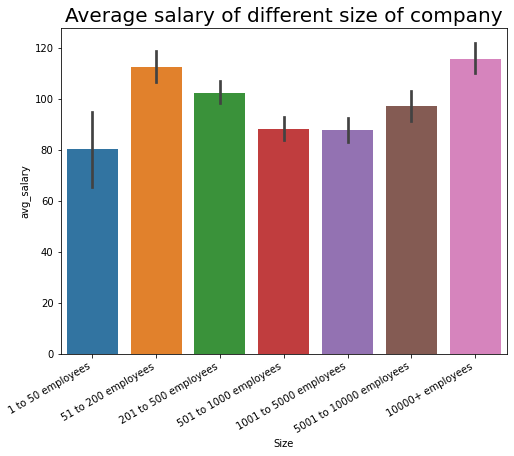

In [4]:
level = ['1 to 50 employees', '51 to 200 employees', '201 to 500 employees', '501 to 1000 employees'
         , '1001 to 5000 employees', '5001 to 10000 employees', '10000+ employees']
mapping = {size: i for i, size in enumerate(level)}

# 把size裡面的英文字對應到數字
key = df['Size'].map(mapping) 

# key.argsort()把key做排序後回傳index，再用iloc以那個順序取值
df = df.iloc[key.argsort()]

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Size', y='avg_salary', data=df)
_ = plt.xticks(rotation=30, horizontalalignment='right')
plt.title('Average salary of different size of company', fontsize=20)

Text(0.5, 1.0, 'Average salary of different type of ownership')

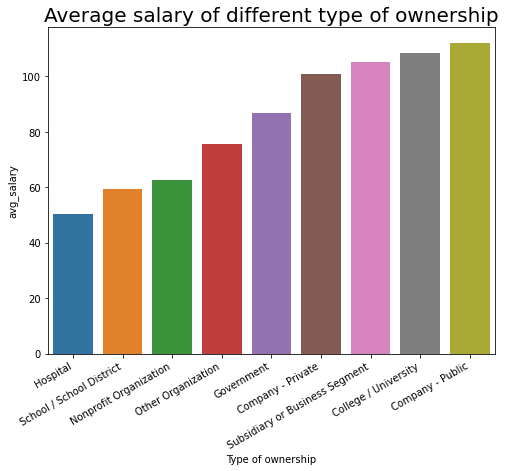

In [5]:
df = df[df['Type of ownership']!='Unknown']

# 要要重設index，不然groupby之後type of ownership會是index，沒辦法畫圖
temp = df.groupby('Type of ownership').mean().sort_values(by='avg_salary').reset_index()
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Type of ownership', y='avg_salary', data=temp)
_ = plt.xticks(rotation=30, horizontalalignment='right')
plt.title('Average salary of different type of ownership', fontsize=20)

Text(0.5, 1.0, 'Average salary of different level of revenue')

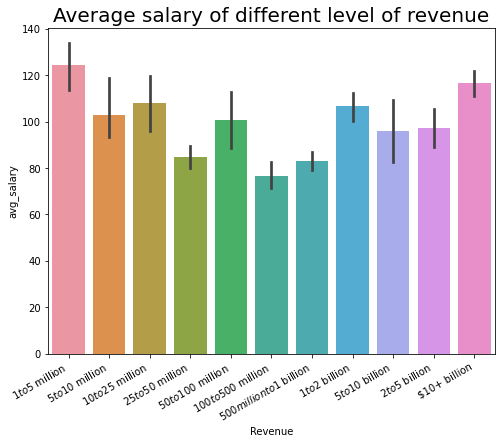

In [6]:
df = df[df['Revenue']!='Unknown / Non-Applicable']
df['Revenue'] = df['Revenue'].apply(lambda x: x.split(' (')[0])

level = ['$1 to $5 million', '$5 to $10 million', '$10 to $25 million', '$25 to $50 million', '$50 to $100 million',
         '$100 to $500 million', '$500 million to $1 billion', '$1 to $2 billion', '$5 to $10 billion',
         '$2 to $5 billion', '$10+ billion']
mapping = {revenue: i for i, revenue in enumerate(level)}

# 把revenue裡面的英文字對應到數字
key = df['Revenue'].map(mapping) 

# key.argsort()把key做排序後回傳index，再用iloc以那個順序取值
df = df.iloc[key.argsort()]


fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Revenue', y='avg_salary', data=df)
_ = plt.xticks(rotation=30, horizontalalignment='right')
plt.title('Average salary of different level of revenue', fontsize=20)

In [7]:
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Size,Type of ownership,Sector,Revenue,avg_salary,age,python_yn,R_yn,spark,aws,excel
411,Principal Data Scientist (Computational Chemis...,$108K-$173K,4.7,Recursion Pharmaceuticals,51 to 200 employees,Company - Private,Biotech & Pharmaceuticals,$1 to $5 million,140.5,7.0,1,0,0,1,0
414,Principal Data Scientist (Computational Chemis...,$108K-$173K,4.7,Recursion Pharmaceuticals,51 to 200 employees,Company - Private,Biotech & Pharmaceuticals,$1 to $5 million,140.5,7.0,1,0,0,1,0
178,Data Scientist,$88K-$148K,2.8,Berg Health,51 to 200 employees,Company - Private,Biotech & Pharmaceuticals,$1 to $5 million,118.0,14.0,1,0,0,0,1
413,Principal Data Scientist (Computational Chemis...,$108K-$173K,4.7,Recursion Pharmaceuticals,51 to 200 employees,Company - Private,Biotech & Pharmaceuticals,$1 to $5 million,140.5,7.0,1,0,0,1,0
412,Principal Data Scientist (Computational Chemis...,$108K-$173K,4.7,Recursion Pharmaceuticals,51 to 200 employees,Company - Private,Biotech & Pharmaceuticals,$1 to $5 million,140.5,7.0,1,0,0,1,0


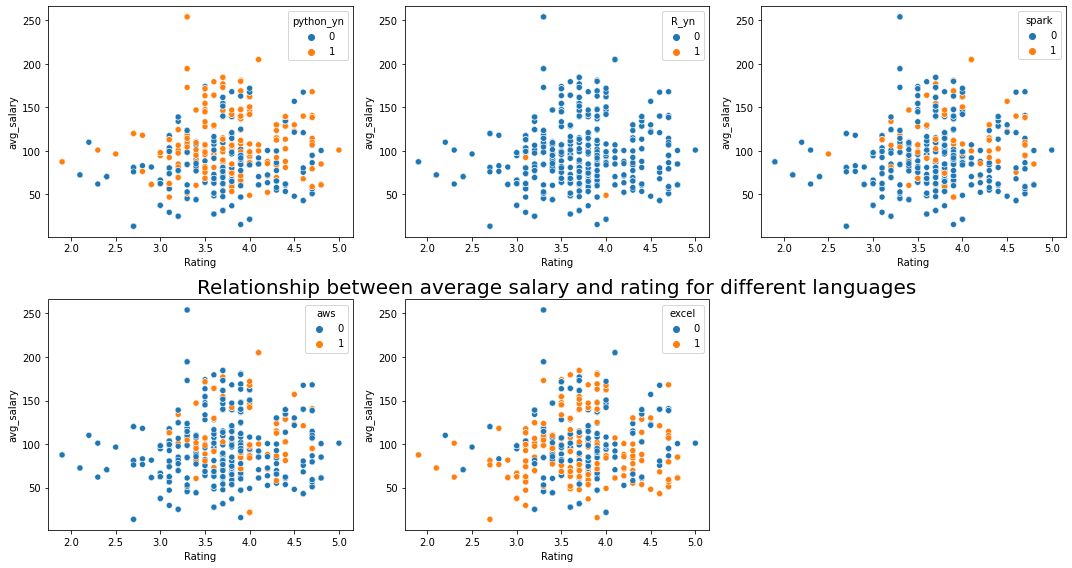

In [8]:
fig, ax = plt.subplots(figsize=(15, 8))

for i, lang in list(enumerate([x for x in df.columns[-5:]], start=1)):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x='Rating', y='avg_salary', hue=lang)

plt.title('Relationship between average salary and rating for different languages', fontsize=20)
plt.tight_layout()

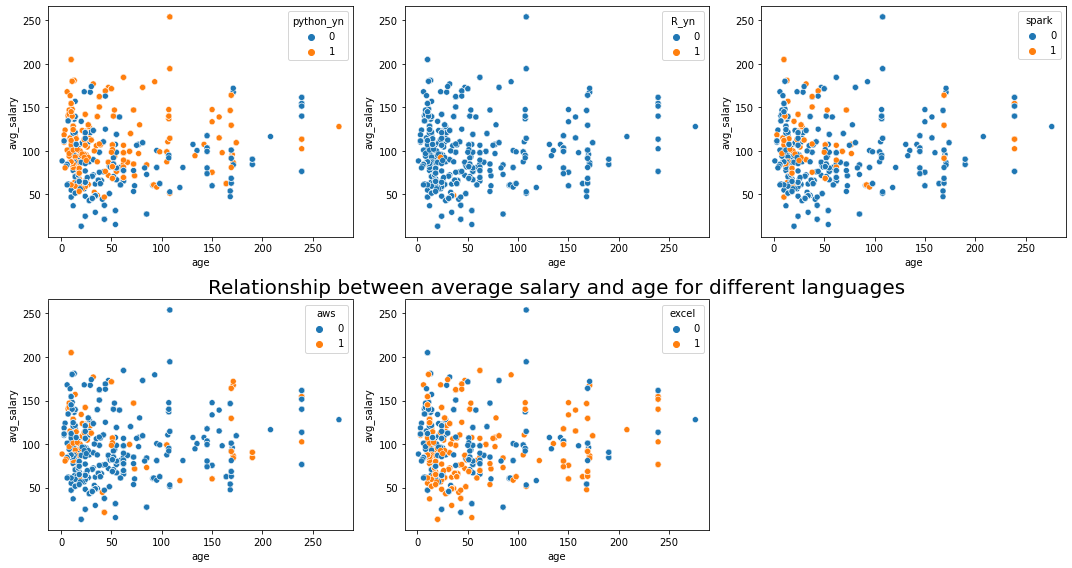

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))

for i, lang in list(enumerate([x for x in df.columns[-5:]], start=1)):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x='age', y='avg_salary', hue=lang)  
    
plt.title('Relationship between average salary and age for different languages', fontsize=20)
plt.tight_layout()